In [32]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
from typing import Callable, List, Tuple, Union

from keras.layers import Dense, Input, Layer
from keras import Model


def _architecture_builder(input_shape: Tuple, output_shape: int, neurons: List[int]) -> List[Layer]:
    layers = [Input(input_shape)]
    for n in neurons:
        layers.append(Dense(n, activation='relu'))
    layers.append(Dense(output_shape, activation='sigmoid'))
    return layers


def _model_builder(layers: List[Layer]) -> Model:
    inputs = layers[0]
    layer = layers[1](inputs)
    for l in layers[2:]:
        layer = l(layer)
    model = Model(inputs, layer)
    return model


def dense_encoder_decoder(input_shape: Tuple, output_shape: int, encoder_size: int, neurons: List[int],
                          optimizer: Union[Callable, str] = 'adam', loss: Union[Callable, str] = 'mse')\
        -> Tuple[Model, Model, Model]:

    encoder_layers = _architecture_builder(input_shape, encoder_size, neurons)
    decoder_layers = _architecture_builder((encoder_size,), output_shape, neurons[::-1])
    encoder_decoder_layers = encoder_layers + decoder_layers[1:]
    encoder = _model_builder(encoder_layers)
    decoder = _model_builder(decoder_layers)
    encoder_decoder = _model_builder(encoder_decoder_layers)
    encoder_decoder.compile(optimizer=optimizer, loss=loss)
    return encoder_decoder, encoder, decoder

In [0]:
autoencoder, encoder, decoder = dense_encoder_decoder((784,), 784, 2, [784,128,64,32])

autoencoder.compile(optimizer='adam', loss='mse')

In [35]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

60000/60000 [==============================] - 27s 456us/step - loss: 0.0760 - val_loss: 0.0676
Epoch 2/50
60000/60000 [==============================] - 28s 466us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 3/50
60000/60000 [==============================] - 26s 437us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 4/50
60000/60000 [==============================] - 25s 417us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 5/50
60000/60000 [==============================] - 25s 420us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 6/50
60000/60000 [==============================] - 25s 417us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 7/50
60000/60000 [==============================] - 25s 411us/step - loss: 0.0674 - val_loss: 0.0675
Epoch 8/50
60000/60000 [==============================] - 25s 413us/step - loss: 0.0673 - val_loss: 0.0675
Epoch 9/50
60000/60000 [==============================] - 25s 418us/step - loss: 0.0673 - val_loss: 0.0675
Epoch 10/50
60000/60000 [=======================

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0774 - val_loss: 0.0676
Epoch 2/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 3/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 4/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 5/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.0674 - val_loss: 0.0675
Epoch 6/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0673 - val_loss: 0.0676
Epoch 7/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.0674 - val_loss: 0.0676
Epoch 8/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.0673 - val_loss: 0.0675
Epoch 9/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.0673 - val_

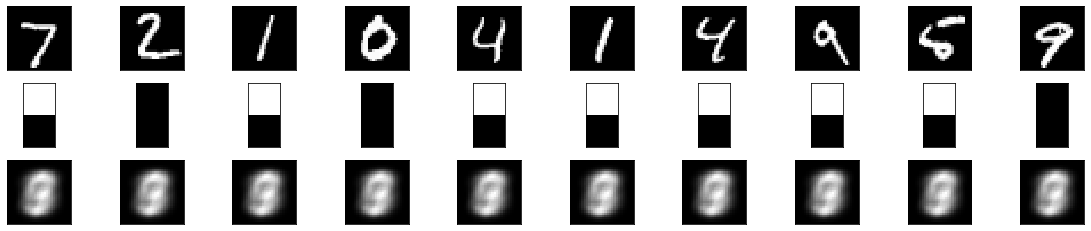

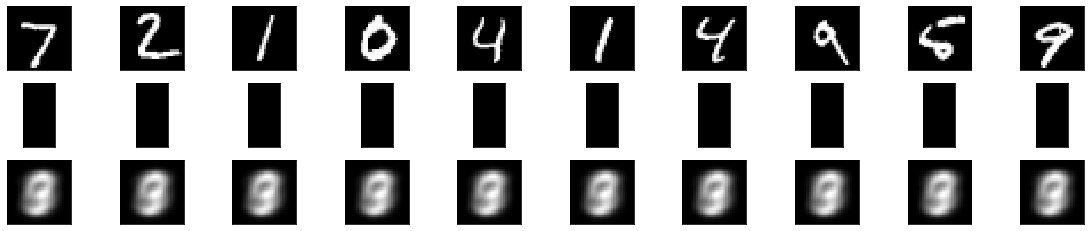

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(2,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [37]:
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)


print(encoded_imgs)
import random
x=np.random.rand(10, 2)
# x=x*255
# for i in range(100):
#   for j in range(100):
#     x[j+100*i][0]=i*0.01
#     x[j+100*i][1]=j*0.01
print(x)
print(x.shape)
generated = decoder.predict(x)
print(generated.shape)
print(generated)


[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.29150868 0.01036482]
 [0.90387085 0.70348146]
 [0.26425945 0.17676214]
 [0.3400018  0.98807374]
 [0.99242586 0.06884492]
 [0.80227956 0.99550831]
 [0.33237161 0.3383138 ]
 [0.90819279 0.70276669]
 [0.58889125 0.0020937 ]
 [0.78232592 0.84803123]]
(10, 2)
(10, 784)
[[0.00350827 0.00342089 0.00351292 ... 0.00352252 0.00354195 0.00350255]
 [0.00215325 0.00216568 0.00219634 ... 0.00218561 0.00220457 0.00219783]
 [0.00336358 0.0032914  0.00337595 ... 0.00338167 0.00339538 0.00336495]
 ...
 [0.00214949 0.0021621  0.00219271 ... 0.00218192 0.00220084 0.0021942 ]
 [0.00323284 0.00316632 0.00324866 ... 0.00324577 0.003268   0.00323537]
 [0.00218433 0.0021947  0.00222662 ... 0.00221652 0.00223643 0.00222743]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.32197344 0.77815611]
 [0.56579786 0.27665316]
 [0.25274888 0.34105311]
 [0.33516083 0.39257568]
 [0.07629428 0.43707317]
 [0.20030309 0.86495169]
 [0.59569047 0.75

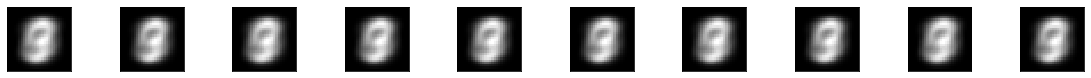

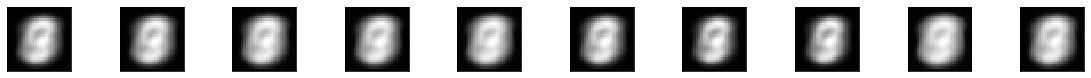

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(generated[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)